# Logistic regression in Tensorflow

In [7]:
import data
from data import *
import tf_logreg
import logreg
import tf_deep

iteration 0: loss 13.283375370859183


C:\Users\Ana\Desktop\Duboko Ucenje\0\logreg.py:34: RuntimeWarning: divide by zero encountered in log
  log_class_probs = np.log(class_probs)        #1xN


iteration 100: loss 0.7651820670012872
iteration 200: loss 0.5837032719176578
iteration 300: loss 0.44464356637938546
iteration 400: loss 0.33513341154810694
iteration 500: loss 0.26673497795341716
iteration 600: loss 0.7480605595484975
iteration 700: loss 0.44751996530156457
iteration 800: loss 0.3437459060369378
iteration 900: loss 1.2951291458017051
(300, 3)
Accuracy:  0.976666666667
Precision / Recall:  [(0.96999999999999997, 0.96039603960396036), (0.98999999999999999, 0.98999999999999999), (0.96999999999999997, 0.97979797979797978)]
Confussion Matrix:  [[97  1  2]
 [ 1 99  0]
 [ 3  0 97]]


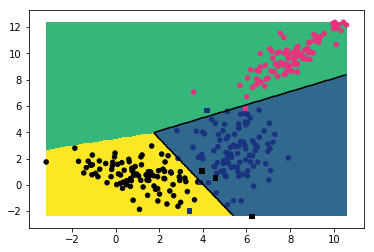

In [5]:
np.random.seed(100)
  
# get the training dataset
X,Y_ = sample_gauss_2d(3,100)
W,b = logreg.logreg_train(X,Y_)
# evaluate the model on the training dataset
probs = logreg.logreg_classify(X,W,b)
print(probs.shape)
#predicted classes
Y = np.hstack([ np.argmax(probs[i][:]) for i in range(probs.shape[0])])
  
#reshaping for other methods purposes
Y_ = np.hstack(Y_)

accuracy, pr, M= data.eval_perf_multi(Y, Y_)
print("Accuracy: ",accuracy)
print("Precision / Recall: ",pr)
print("Confussion Matrix: ",M)
  
 #graph the decision surface
decfun = logreg.logreg_decfun(X,W,b)
bbox=(np.min(X, axis=0), np.max(X, axis=0))
data.graph_surface(decfun, bbox, offset=0.5)

# graph the data points
data.graph_data(X, Y_, Y, special=[])

# show the plot
plt.show()

Instructions for updating:
Use `tf.global_variables_initializer` instead.
0  loss:  7.82252
100  loss:  0.527446
200  loss:  0.492109
300  loss:  0.467936
400  loss:  0.450979
500  loss:  0.438887
600  loss:  0.430113
700  loss:  0.423638
800  loss:  0.418785
900  loss:  0.415095
[[-0.12695108 -0.44484419  0.57179505]
 [-0.23721325  0.47307441 -0.23586123]]
Accuracy:  0.96
Precision / Recall:  [(0.91000000000000003, 0.96808510638297873), (0.96999999999999997, 0.97979797979797978), (1.0, 0.93457943925233644)]
Confussion Matrix:  [[ 91   2   7]
 [  3  97   0]
 [  0   0 100]]


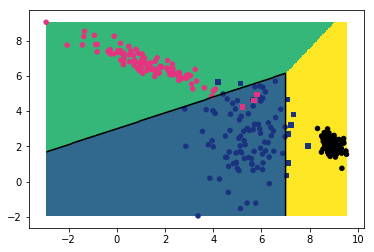

In [6]:
import tensorflow as tf
# inicijaliziraj generatore slucajnih brojeva
np.random.seed(100)
tf.set_random_seed(100)

# instanciraj podatke X i labele Yoh_
X,Y_ = data.sample_gauss(3,100)
Yoh_ = data.class_to_onehot(Y_)

# izgradi graf
tlfr = tf_logreg.TFLogreg(X.shape[1],Yoh_.shape[1],0.1)
# nauci parametre
W,b = tlfr.train(X,Yoh_,1000)
print(W)
# dohvati vjerojatnosti na skupu za ucenje
probs = tlfr.eval(X)
Y = np.argmax(probs[0],axis=1)
accuracy, pr, M= data.eval_perf_multi(Y, Y_)
print("Accuracy: ",accuracy)
print("Precision / Recall: ",pr)
print("Confussion Matrix: ",M)
 
#graph the decision surface
decfun = logreg.logreg_decfun(X,W,b)
bbox=(np.min(X, axis=0), np.max(X, axis=0))
data.graph_surface(decfun, bbox, offset=0.5)
# graph the data points
data.graph_data(X, Y_, Y, special=[])
# show the plot
plt.show()

Instructions for updating:
Use `tf.global_variables_initializer` instead.
0  loss:  5.46935
100  loss:  0.513005
200  loss:  0.47966
300  loss:  0.459059
400  loss:  0.444534
500  loss:  0.434108
600  loss:  0.426498
700  loss:  0.420852
800  loss:  0.416603
900  loss:  0.413362
Accuracy:  0.963333333333
Precision / Recall:  [(0.92000000000000004, 0.96842105263157896), (0.96999999999999997, 0.97979797979797978), (1.0, 0.94339622641509435)]
Confussion Matrix:  [[ 92   2   6]
 [  3  97   0]
 [  0   0 100]]


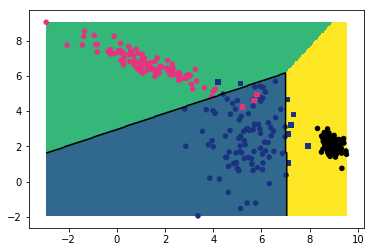

In [18]:
# inicijaliziraj generatore slucajnih brojeva
np.random.seed(100)
tf.set_random_seed(100)

# instanciraj podatke X i labele Yoh_
#X,Y_ = sample_gmm_2d(6,2,10)
X,Y_ = data.sample_gauss(3,100)
Yoh_ = class_to_onehot(Y_)

# izgradi graf
tlfr = tf_deep.TFDeep([2,3],param_lambda=0.25,param_delta=0.1)

# nauci parametre
tlfr.train(X,Yoh_,1000)
# dohvati vjerojatnosti na skupu za ucenje
probs = tlfr.eval(X)

Y = np.argmax(probs[0],axis=1)

accuracy, pr, M= data.eval_perf_multi(Y, Y_)
print("Accuracy: ",accuracy)
print("Precision / Recall: ",pr)
print("Confussion Matrix: ",M)

#graph the decision surface
decfun = lambda x: tlfr.eval(x)[0].argmax(axis=1)
bbox=(np.min(X, axis=0), np.max(X, axis=0))
data.graph_surface(decfun, bbox, offset=0.5)

# graph the data points
data.graph_data(X, Y_, Y, special=[])

# show the plot
plt.show()

Instructions for updating:
Use `tf.global_variables_initializer` instead.
0  loss:  0.650352
100  loss:  0.46414
200  loss:  0.447525
300  loss:  0.443514
400  loss:  0.442305
500  loss:  0.441899
600  loss:  0.441754
700  loss:  0.4417
800  loss:  0.441678
900  loss:  0.441669
Accuracy:  0.675
Precision / Recall:  [(0.58750000000000002, 0.71212121212121215), (0.76249999999999996, 0.64893617021276595)]
Confussion Matrix:  [[47 33]
 [19 61]]


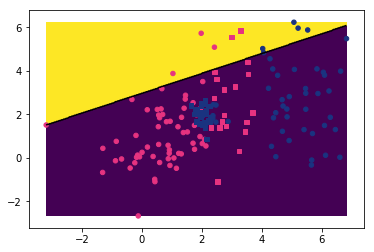

In [29]:
# inicijaliziraj generatore slucajnih brojeva
np.random.seed(100)
tf.set_random_seed(100)

# instanciraj podatke X i labele Yoh_
X,Y_ = sample_gmm_2d(4,2,40)
Yoh_ = class_to_onehot(Y_)

# izgradi graf
tlfr_1 = tf_deep.TFDeep([2,2],param_lambda=0.001,param_delta=0.1)

# nauci parametre
tlfr_1.train(X,Yoh_,1000)
# dohvati vjerojatnosti na skupu za ucenje
probs = tlfr_1.eval(X)

Y = np.argmax(probs[0],axis=1)

accuracy, pr, M= data.eval_perf_multi(Y, Y_)
print("Accuracy: ",accuracy)
print("Precision / Recall: ",pr)
print("Confussion Matrix: ",M)

#graph the decision surface
decfun = lambda x: tlfr.eval(x)[0].argmax(axis=1)
bbox=(np.min(X, axis=0), np.max(X, axis=0))
data.graph_surface(decfun, bbox, offset=0.5)

# graph the data points
data.graph_data(X, Y_, Y, special=[])

# show the plot
plt.show()

Instructions for updating:
Use `tf.global_variables_initializer` instead.
0  loss:  11.5945
100  loss:  0.3782
200  loss:  0.346307
300  loss:  0.327625
400  loss:  0.311543
500  loss:  0.293948
600  loss:  0.284654
700  loss:  0.277931
800  loss:  0.273246
900  loss:  0.269666
Accuracy:  0.875
Precision / Recall:  [(0.91249999999999998, 0.84883720930232553), (0.83750000000000002, 0.90540540540540537)]
Confussion Matrix:  [[73  7]
 [13 67]]


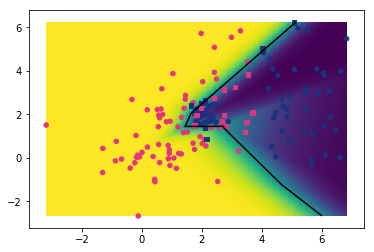

In [32]:
# inicijaliziraj generatore slucajnih brojeva
np.random.seed(100)
tf.set_random_seed(100)

# instanciraj podatke X i labele Yoh_
X,Y_ = sample_gmm_2d(4,2,40)
Yoh_ = class_to_onehot(Y_)

# izgradi graf
tlfr_2 = tf_deep.TFDeep([2,10,2],param_lambda=0.0001,param_delta=0.1)

# nauci parametre
tlfr_2.train(X,Yoh_,1000)
# dohvati vjerojatnosti na skupu za ucenje
probs = tlfr_2.eval(X)

Y = np.argmax(probs[0],axis=1)

accuracy, pr, M= data.eval_perf_multi(Y, Y_)
print("Accuracy: ",accuracy)
print("Precision / Recall: ",pr)
print("Confussion Matrix: ",M)

#graph the decision surface
decfun = lambda x: tlfr_2.eval(x)[0][:,1]
bbox=(np.min(X, axis=0), np.max(X, axis=0))
data.graph_surface(decfun, bbox, offset=0.5)

# graph the data points
data.graph_data(X, Y_, Y, special=[])

# show the plot
plt.show()

Instructions for updating:
Use `tf.global_variables_initializer` instead.
0  loss:  8.80899
100  loss:  0.347178
200  loss:  0.318166
300  loss:  0.308393
400  loss:  0.302809
500  loss:  0.293817
600  loss:  0.29013
700  loss:  0.285774
800  loss:  0.282624
900  loss:  0.274759
Accuracy:  0.9
Precision / Recall:  [(0.97499999999999998, 0.84782608695652173), (0.82499999999999996, 0.97058823529411764)]
Confussion Matrix:  [[78  2]
 [14 66]]


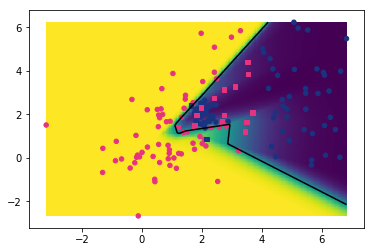

In [31]:
# inicijaliziraj generatore slucajnih brojeva
np.random.seed(100)
tf.set_random_seed(100)

# instanciraj podatke X i labele Yoh_
X,Y_ = sample_gmm_2d(4,2,40)
Yoh_ = class_to_onehot(Y_)

# izgradi graf
tlfr_3 = tf_deep.TFDeep([2,10,10,2],param_lambda=0.0001,param_delta=0.1)

# nauci parametre
tlfr_3.train(X,Yoh_,1000)
# dohvati vjerojatnosti na skupu za ucenje
probs = tlfr_3.eval(X)

Y = np.argmax(probs[0],axis=1)

accuracy, pr, M= data.eval_perf_multi(Y, Y_)
print("Accuracy: ",accuracy)
print("Precision / Recall: ",pr)
print("Confussion Matrix: ",M)

#graph the decision surface
decfun = lambda x: tlfr_3.eval(x)[0][:,1]
bbox=(np.min(X, axis=0), np.max(X, axis=0))
data.graph_surface(decfun, bbox, offset=0.5)

# graph the data points
data.graph_data(X, Y_, Y, special=[])

# show the plot
plt.show()

# Podaci (6,2,10)

Instructions for updating:
Use `tf.global_variables_initializer` instead.
0  loss:  2.69797
100  loss:  0.66825
200  loss:  0.66819
300  loss:  0.668183
400  loss:  0.668182
500  loss:  0.668182
600  loss:  0.668182
700  loss:  0.668182
800  loss:  0.668182
900  loss:  0.668182
Accuracy:  0.6
Precision / Recall:  [(0.56666666666666665, 0.6071428571428571), (0.6333333333333333, 0.59375)]
Confussion Matrix:  [[17 13]
 [11 19]]


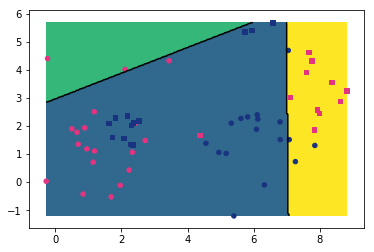

In [33]:
# inicijaliziraj generatore slucajnih brojeva
np.random.seed(100)
tf.set_random_seed(100)

# instanciraj podatke X i labele Yoh_
X,Y_ = sample_gmm_2d(6,2,10)
Yoh_ = class_to_onehot(Y_)

# izgradi graf
tlfr_1 = tf_deep.TFDeep([2,2],param_lambda=0.0001,param_delta=0.1)

# nauci parametre
tlfr_1.train(X,Yoh_,1000)
# dohvati vjerojatnosti na skupu za ucenje
probs = tlfr_1.eval(X)

Y = np.argmax(probs[0],axis=1)

accuracy, pr, M= data.eval_perf_multi(Y, Y_)
print("Accuracy: ",accuracy)
print("Precision / Recall: ",pr)
print("Confussion Matrix: ",M)

#graph the decision surface
decfun = lambda x: tlfr.eval(x)[0].argmax(axis=1)
bbox=(np.min(X, axis=0), np.max(X, axis=0))
data.graph_surface(decfun, bbox, offset=0.5)

# graph the data points
data.graph_data(X, Y_, Y, special=[])

# show the plot
plt.show()

Instructions for updating:
Use `tf.global_variables_initializer` instead.
0  loss:  6.69468
100  loss:  0.579498
200  loss:  0.560881
300  loss:  0.54752
400  loss:  0.536783
500  loss:  0.528102
600  loss:  0.516744
700  loss:  0.513645
800  loss:  0.510972
900  loss:  0.501807
Accuracy:  0.733333333333
Precision / Recall:  [(0.6333333333333333, 0.79166666666666663), (0.83333333333333337, 0.69444444444444442)]
Confussion Matrix:  [[19 11]
 [ 5 25]]


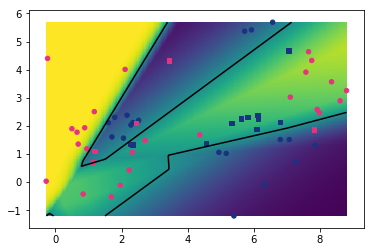

In [34]:
# inicijaliziraj generatore slucajnih brojeva
np.random.seed(100)
tf.set_random_seed(100)

# instanciraj podatke X i labele Yoh_
X,Y_ = sample_gmm_2d(6,2,10)
Yoh_ = class_to_onehot(Y_)

# izgradi graf
tlfr_2 = tf_deep.TFDeep([2,10,2],param_lambda=0.0001,param_delta=0.1)

# nauci parametre
tlfr_2.train(X,Yoh_,1000)
# dohvati vjerojatnosti na skupu za ucenje
probs = tlfr_2.eval(X)

Y = np.argmax(probs[0],axis=1)

accuracy, pr, M= data.eval_perf_multi(Y, Y_)
print("Accuracy: ",accuracy)
print("Precision / Recall: ",pr)
print("Confussion Matrix: ",M)

#graph the decision surface
decfun = lambda x: tlfr_2.eval(x)[0][:,1]
bbox=(np.min(X, axis=0), np.max(X, axis=0))
data.graph_surface(decfun, bbox, offset=0.5)

# graph the data points
data.graph_data(X, Y_, Y, special=[])

# show the plot
plt.show()

Instructions for updating:
Use `tf.global_variables_initializer` instead.
0  loss:  10.0933
100  loss:  0.475438
200  loss:  0.454811
300  loss:  0.39118
400  loss:  0.388968
500  loss:  0.338052
600  loss:  0.299449
700  loss:  0.300131
800  loss:  0.291484
900  loss:  0.289417
1000  loss:  0.288396
1100  loss:  0.282048
1200  loss:  0.283624
1300  loss:  0.268053
1400  loss:  0.264894
1500  loss:  0.270739
1600  loss:  0.320717
1700  loss:  0.264221
1800  loss:  0.26137
1900  loss:  0.2769
2000  loss:  0.2793
2100  loss:  0.243411
2200  loss:  0.227652
2300  loss:  0.28612
2400  loss:  0.26662
2500  loss:  0.259884
2600  loss:  0.236578
2700  loss:  0.257804
2800  loss:  0.261285
2900  loss:  0.249609
3000  loss:  0.241019
3100  loss:  0.282488
3200  loss:  0.219057
3300  loss:  0.210531
3400  loss:  0.22755
3500  loss:  0.225008
3600  loss:  0.219969
3700  loss:  0.201745
3800  loss:  0.207466
3900  loss:  0.21704
4000  loss:  0.222056
4100  loss:  0.2134
4200  loss:  0.20688
4300  

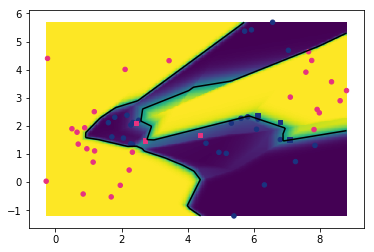

In [42]:
# inicijaliziraj generatore slucajnih brojeva
np.random.seed(100)
tf.set_random_seed(100)

# instanciraj podatke X i labele Yoh_
X,Y_ = sample_gmm_2d(6,2,10)
Yoh_ = class_to_onehot(Y_)

# izgradi graf
tlfr_2 = tf_deep.TFDeep([2,10,10,2],param_lambda=0.0001,param_delta=0.1)

# nauci parametre
tlfr_2.train(X,Yoh_,10000)
# dohvati vjerojatnosti na skupu za ucenje
probs = tlfr_2.eval(X)

Y = np.argmax(probs[0],axis=1)

accuracy, pr, M= data.eval_perf_multi(Y, Y_)
print("Accuracy: ",accuracy)
print("Precision / Recall: ",pr)
print("Confussion Matrix: ",M)

#graph the decision surface
decfun = lambda x: tlfr_2.eval(x)[0][:,1]
bbox=(np.min(X, axis=0), np.max(X, axis=0))
data.graph_surface(decfun, bbox, offset=0.5)

# graph the data points
data.graph_data(X, Y_, Y, special=[])

# show the plot
plt.show()

Instructions for updating:
Use `tf.global_variables_initializer` instead.
0  loss:  2.22246
100  loss:  0.662253
200  loss:  0.628793
300  loss:  0.601844
400  loss:  0.583215
500  loss:  0.57216
600  loss:  0.564602
700  loss:  0.558089
800  loss:  0.552024
900  loss:  0.546173
1000  loss:  0.540397
1100  loss:  0.534598
1200  loss:  0.528711
1300  loss:  0.522694
1400  loss:  0.516525
1500  loss:  0.510173
1600  loss:  0.503544
1700  loss:  0.496313
1800  loss:  0.487773
1900  loss:  0.477384
2000  loss:  0.465582
2100  loss:  0.45333
2200  loss:  0.441426
2300  loss:  0.430207
2400  loss:  0.419682
2500  loss:  0.409791
2600  loss:  0.40048
2700  loss:  0.391587
2800  loss:  0.382835
2900  loss:  0.373843
3000  loss:  0.363776
3100  loss:  0.353213
3200  loss:  0.344362
3300  loss:  0.33672
3400  loss:  0.330013
3500  loss:  0.324106
3600  loss:  0.321983
3700  loss:  0.32603
3800  loss:  0.321966
3900  loss:  0.318553
4000  loss:  0.315766
4100  loss:  0.313477
4200  loss:  0.31153

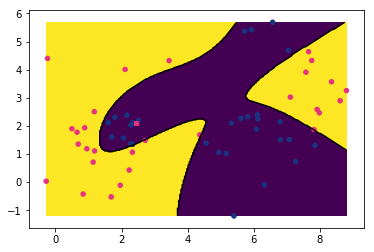

In [41]:
# inicijaliziraj generatore slucajnih brojeva
np.random.seed(100)
tf.set_random_seed(100)

# instanciraj podatke X i labele Yoh_
X,Y_ = sample_gmm_2d(6,2,10)
Yoh_ = class_to_onehot(Y_)

# izgradi graf
tlfr_2 = tf_deep.TFDeep([2,10,10,2],param_lambda=0.0001,param_delta=0.1,activation=tf.nn.sigmoid)

# nauci parametre
tlfr_2.train(X,Yoh_,10000)
# dohvati vjerojatnosti na skupu za ucenje
probs = tlfr_2.eval(X)

Y = np.argmax(probs[0],axis=1)

accuracy, pr, M= data.eval_perf_multi(Y, Y_)
print("Accuracy: ",accuracy)
print("Precision / Recall: ",pr)
print("Confussion Matrix: ",M)

#graph the decision surface
decfun = lambda x: tlfr_2.eval(x)[0].argmax(axis=1)
bbox=(np.min(X, axis=0), np.max(X, axis=0))
data.graph_surface(decfun, bbox, offset=0.5)

# graph the data points
data.graph_data(X, Y_, Y, special=[])

# show the plot
plt.show()

# SVM 

In [43]:
import ksvm_wrap

Accuracy:  0.933333333333
Precision / Recall:  [(1.0, 0.88235294117647056), (0.8666666666666667, 1.0)]
Confussion Matrix:  [[30  0]
 [ 4 26]]


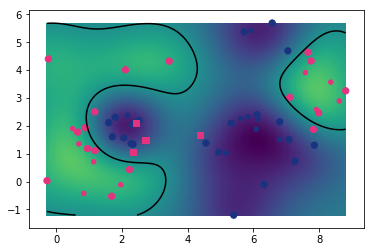

In [45]:
# inicijaliziraj generatore slucajnih brojeva
np.random.seed(100)
# instanciraj podatke X i labele Yoh_

X,Y_ = sample_gmm_2d(6,2,10)
#print(Y_)
ksvm = ksvm_wrap.KSVMWrap(X,Y_)
# nauci parametre
scores = ksvm.scores(X)
Y = ksvm.predict(X)

accuracy, pr, M= data.eval_perf_multi(Y, Y_)
print("Accuracy: ",accuracy)
print("Precision / Recall: ",pr)
print("Confussion Matrix: ",M)
#graph the decision surface
decfun = lambda x: ksvm.scores(x)
bbox=(np.min(X, axis=0), np.max(X, axis=0))
data.graph_surface(decfun, bbox, offset=0.5)
data.graph_data(X, Y_, Y, special=[ksvm.support()])
# show the plot
plt.show()


Accuracy:  0.825
Precision / Recall:  [(0.65000000000000002, 0.8125), (0.93333333333333335, 0.77777777777777779), (0.75, 0.9375)]
Confussion Matrix:  [[13  6  1]
 [ 3 56  1]
 [ 0 10 30]]


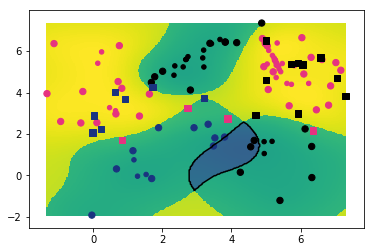

In [47]:
# inicijaliziraj generatore slucajnih brojeva
np.random.seed(100)
# instanciraj podatke X i labele Yoh_

X,Y_ = sample_gmm_2d(6,3,20)
#print(Y_)
ksvm = ksvm_wrap.KSVMWrap(X,Y_)
# nauci parametre
scores = ksvm.scores(X)
Y = ksvm.predict(X)

accuracy, pr, M= data.eval_perf_multi(Y, Y_)
print("Accuracy: ",accuracy)
print("Precision / Recall: ",pr)
print("Confussion Matrix: ",M)
#graph the decision surface
decfun = lambda x: ksvm.scores(x)[:,1]
bbox=(np.min(X, axis=0), np.max(X, axis=0))
data.graph_surface(decfun, bbox, offset=0.5)
data.graph_data(X, Y_, Y, special=[ksvm.support()])
# show the plot
plt.show()
